Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [7]:
import pandas as pd

df_foursquare = pd.read_csv("../data/foursquare_restaurants.csv")
df_yelp = pd.read_csv("../data/yelp_restaurants.csv")
df_BikeStation = pd.read_csv("../data/CityByke.csv")

merge_fsq = pd.merge(df_BikeStation, df_foursquare, on=['latitude','longitude'])
df_merge_all = pd.merge(merge_fsq, df_yelp, on=['latitude','longitude'])

In [8]:
df_foursquare

,latitude,longitude,fsq_restaurant_number,Fsq_avg_distance,Fsq_avg_price,Fsq_avg_rating
0,49.238105,-123.154966,10,362.600000,1.800000,7.866667
1,49.243375,-123.104978,10,317.100000,1.555556,7.983333
2,49.245135,-123.116098,8,671.625000,1.714286,6.775000
3,49.245535,-123.120496,10,535.500000,1.555556,6.640000
4,49.246243,-123.124373,10,362.600000,1.375000,6.100000
...,...,...,...,...,...,...
240,49.295340,-123.150433,2,881.000000,2.000000,8.700000
241,49.297933,-123.130758,10,649.700000,2.000000,8.044444
242,49.298657,-123.121176,6,858.166667,2.400000,7.820000
243,49.299292,-123.130281,10,739.200000,2.000000,8.044444


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns


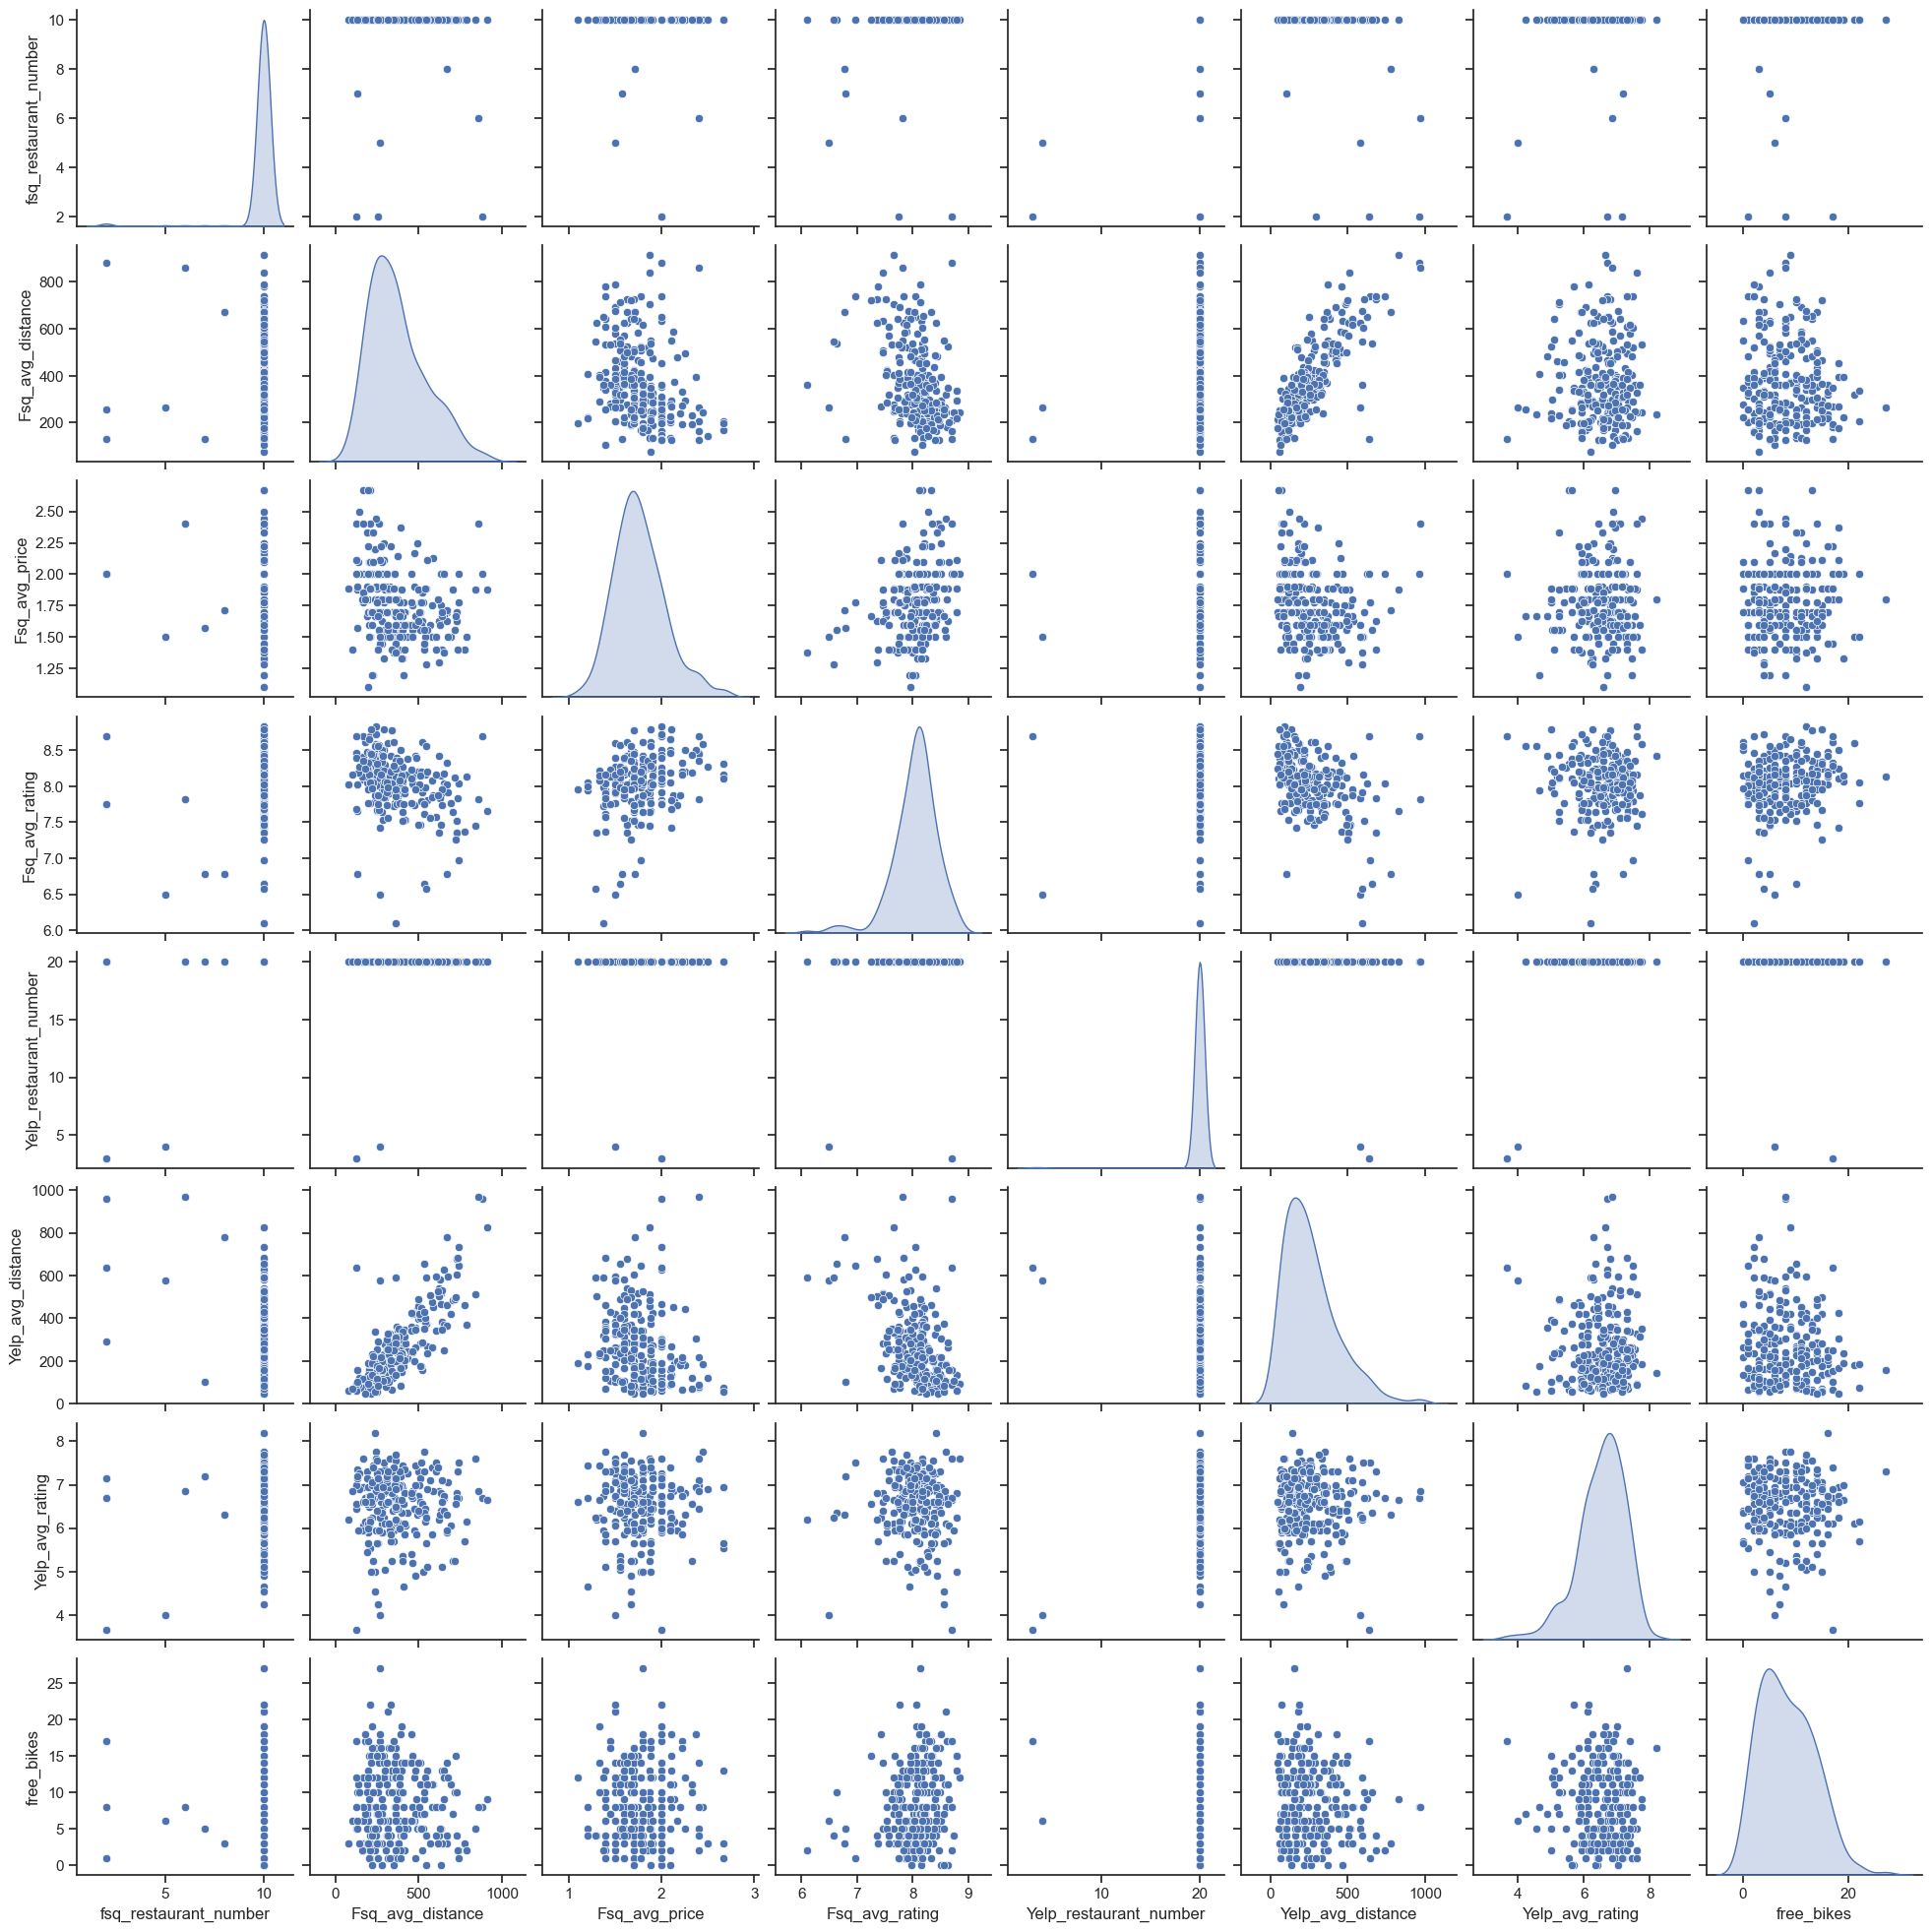

In [15]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_merge_all, diag_kind="kde", vars=['fsq_restaurant_number', 'Fsq_avg_distance','Fsq_avg_price','Fsq_avg_rating','Yelp_restaurant_number','Yelp_avg_distance','Yelp_avg_rating' ,'free_bikes'])
plt.savefig('../data/pairplot.png', dpi=300, bbox_inches='tight')
plt.show()


In [10]:
df_features = df_merge_all[['fsq_restaurant_number','Fsq_avg_distance','Fsq_avg_price','Fsq_avg_rating','Yelp_avg_distance','Yelp_avg_rating' ,'free_bikes']]
df_features.to_csv("../data/features.csv", index=False)
correlation_matrix = df_features.corr(numeric_only=True)
correlation_matrix


plt.figure(figsize=(10, 8))



<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

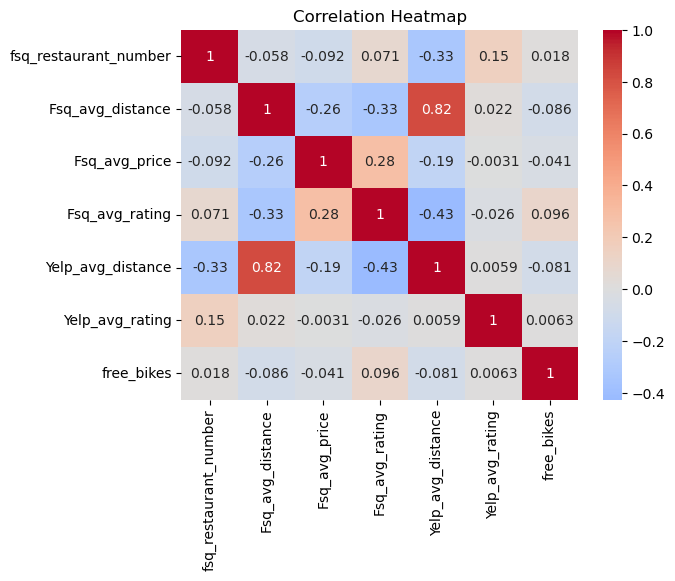

In [11]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title("Correlation Heatmap")
plt.savefig('../data/heatmap.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [15]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection


connection = create_connection("../data/CityBike_places.sqlite")

# Write the DataFrames to the database
df_foursquare.to_sql('foursquare', connection, if_exists='replace', index=False)
df_yelp.to_sql('yelp', connection, if_exists='replace', index=False)
df_BikeStation.to_sql('bike_station', connection, if_exists='replace', index=False)

# Close the database connection
connection.close()

Connection to SQLite DB successful


Look at the data before and after the join to validate your data.

In [16]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [17]:
connection = create_connection("../data/CityBike_places.sqlite")

select_bikes = "SELECT * FROM bike_station"
bikes = execute_read_query(connection, select_bikes)

for station in bikes:
    print(station)

connection.close()

Connection to SQLite DB successful
(0, '10th & Cambie', 49.262487, -123.114397, 9)
(1, 'Yaletown-Roundhouse Station', 49.274566, -123.121817, 4)
(2, 'Dunsmuir & Beatty', 49.279764, -123.110154, 10)
(3, '12th & Yukon (City Hall)', 49.260599, -123.113504, 6)
(4, '8th & Ash', 49.264215, -123.117772, 12)
(5, 'Spyglass & Seawall', 49.270877, -123.115103, 1)
(6, 'Stamps Landing', 49.26893, -123.11813, 5)
(7, 'Ontario & Seawall', 49.271721, -123.104207, 15)
(8, 'Canada Place', 49.287214, -123.11287, 8)
(9, 'Granville & Georgia', 49.282409, -123.118541, 0)
(10, 'Pender & Burrard', 49.287097, -123.118551, 4)
(11, 'Marinaside & Davie', 49.273471, -123.118016, 12)
(12, 'Robson & Hornby', 49.282758, -123.122092, 3)
(13, 'Hornby & Pender', 49.28602, -123.116624, 16)
(14, 'Homer & Robson (Vancouver Public Library)', 49.279739, -123.116251, 4)
(15, 'Beatty & Robson', 49.277483, -123.114279, 6)
(16, 'Beatty & Nelson', 49.275679, -123.116963, 2)
(17, 'Abbott & Cordova', 49.282759, -123.106955, 19)
(18,